<a href="https://colab.research.google.com/github/surajjorwar/NYC-taxi-trip-time-prediction-/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




In [2]:
df = pd.read_csv('/content/drive/MyDrive/Copy of NYC Taxi Data.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
df.shape # their are  1458644 Rows and 11 columns in this data set

(1458644, 11)

# ***1.Trip time duration distributuon  over different localities ***

Manhattan:

Minimum Latitude: 40.699 - Lower tip of Manhattan
Maximum Latitude: 40.878 - Inwood Hill Park area
Minimum Longitude: -74.018 - Battery Park area
Maximum Longitude: -73.907 - Harlem area
Brooklyn:

Minimum Latitude: 40.576 - South Brooklyn near Coney Island
Maximum Latitude: 40.739 - North Brooklyn near Greenpoint
Minimum Longitude: -74.041 - West Brooklyn near Bay Ridge
Maximum Longitude: -73.833 - East Brooklyn near Highland Park
Queens:

Minimum Latitude: 40.489 - Southern part of Queens
Maximum Latitude: 40.813 - Northern part of Queens
Minimum Longitude: -73.962 - Western part of Queens
Maximum Longitude: -73.700 - Eastern part of Queens
Bronx:

Minimum Latitude: 40.785 - Southern part of the Bronx
Maximum Latitude: 40.917 - Northern part of the Bronx
Minimum Longitude: -73.933 - Western part of the Bronx
Maximum Longitude: -73.765 - Eastern part of the Bronx
Staten Island:

Minimum Latitude: 40.477 - Southern tip of Staten Island
Maximum Latitude: 40.652 - Northern tip of Staten Island
Minimum Longitude: -74.259 - Western part of Staten Island
Maximum Longitude: -74.034 - Eastern part of Staten Island

creating two new columns p_loc and d_loc which is picking location and droping location  created on the basis of longititude and latitude of pick and drop ,which gives the names of Boroughs top 5 areas in NEWYORK CITY





In [7]:
#Manhattan
df.loc[df['pickup_latitude'].between(40.699, 40.878) & df['pickup_longitude'].between(-74.018, -73.907), 'p_loc'] = 'Manhattan'
df.loc[df['dropoff_latitude'].between(40.699, 40.878) & df['dropoff_longitude'].between(-74.018, -73.907), 'd_loc'] = 'Manhattan'

#Brooklyn
df.loc[df['pickup_latitude'].between(40.576, 40.739) & df['pickup_longitude'].between(-74.041, -73.833), 'p_loc'] = 'Brooklyn'
df.loc[df['dropoff_latitude'].between(40.576, 40.739) & df['dropoff_longitude'].between(-74.041, -73.833), 'd_loc'] = 'Brooklyn'

#Queens
df.loc[df['pickup_latitude'].between(40.489, 40.813) & df['pickup_longitude'].between(-73.962, -73.700), 'p_loc'] = 'Queens'
df.loc[df['dropoff_latitude'].between(40.489, 40.813) & df['dropoff_longitude'].between(-73.962, -73.700), 'd_loc'] = 'Queens'

#Bronx
df.loc[df['pickup_latitude'].between(40.785, 40.917) & df['pickup_longitude'].between(-73.933, -73.765), 'p_loc'] = 'Bronx'
df.loc[df['dropoff_latitude'].between(40.785, 40.917) & df['dropoff_longitude'].between(-73.933, -73.765), 'd_loc'] = 'Bronx'

#Staten_Island
df.loc[df['pickup_latitude'].between(40.477, 40.652) & df['pickup_longitude'].between(-74.259, -74.034), 'p_loc'] = 'Staten_Island'
df.loc[df['dropoff_latitude'].between(40.477, 40.652) & df['dropoff_longitude'].between(-74.259, -74.034), 'd_loc'] = 'Staten_Island'


In [8]:
result = df.groupby(['p_loc', 'd_loc'])['trip_duration'].sum().reset_index()
result.fillna(1)
result['trip_duration'] =  (result['trip_duration']/3600).round(0)


In [9]:
pivot = result.pivot_table(columns = 'p_loc' ,index =  'd_loc', values = 'trip_duration')

In [10]:
pivot

p_loc,Bronx,Brooklyn,Manhattan,Queens,Staten_Island
d_loc,,,,,
Bronx,216.0,971.0,2796.0,1845.0,NaN
Brooklyn,29.0,31667.0,44124.0,16307.0,1.0
Manhattan,146.0,39656.0,104981.0,46621.0,24.0
Queens,125.0,19069.0,49738.0,26855.0,3.0
Staten_Island,NaN,116.0,158.0,159.0,12.0


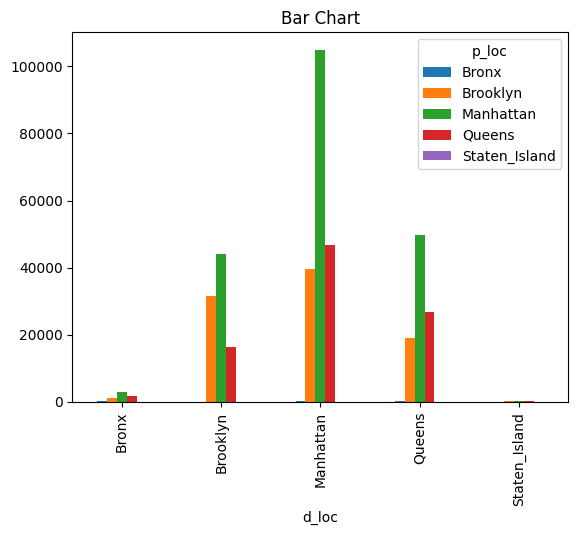

In [11]:
#bar plot
pivot.plot(kind='bar')
plt.title('Bar Chart')
plt.show()

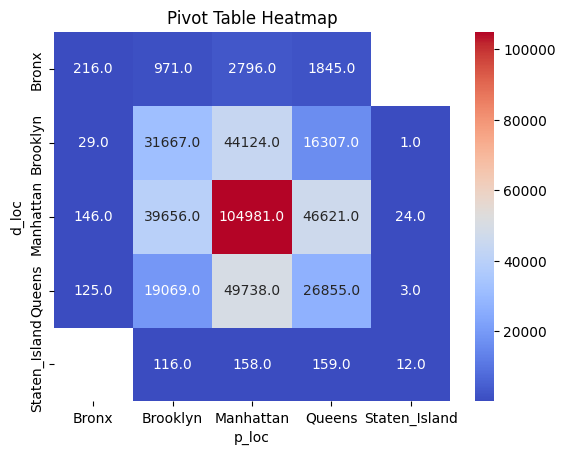

In [12]:
# Heatmap
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Pivot Table Heatmap')
plt.show()

the trip within  manhattan   has the highest time duration ,then manhattan to queens then manhattan to brooklyn ,bronx and staten island has lowest trip duration

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  p_loc               1457848 non-null  object 
 12  d_loc               1453510 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 144.7+ MB


# .Trip time duration distributuon over different localities on weekends  *

In [14]:
#converting to date tme format
df['pickup_datetime']  =  pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] =  pd.to_datetime(df['dropoff_datetime'])
# extract weekdays and weekends from pickup_datetime

df['week_day'] = df['pickup_datetime'].dt.day_name()
df['weekend'] = df['week_day'].isin(['Saturday', 'Sunday'])
weekend_df = df[df['weekend']==True]

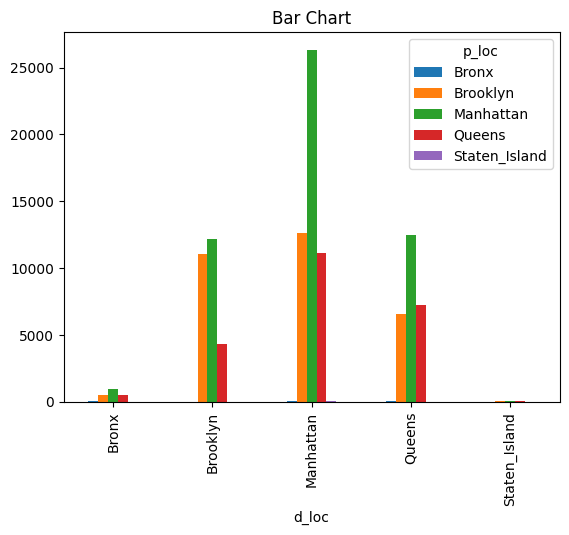

In [15]:
WE_result = weekend_df.groupby(['p_loc', 'd_loc'])['trip_duration'].sum().reset_index()
WE_result.fillna(1)
WE_result['trip_duration'] =  (WE_result['trip_duration']/3600).round(0)
WE_pivot = WE_result.pivot_table(columns = 'p_loc' ,index =  'd_loc', values = 'trip_duration')
WE_pivot.plot(kind='bar')
plt.title('Bar Chart')
plt.show()

# **2. busiest hours of the day**

In [16]:
#creating pick up hour  column
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

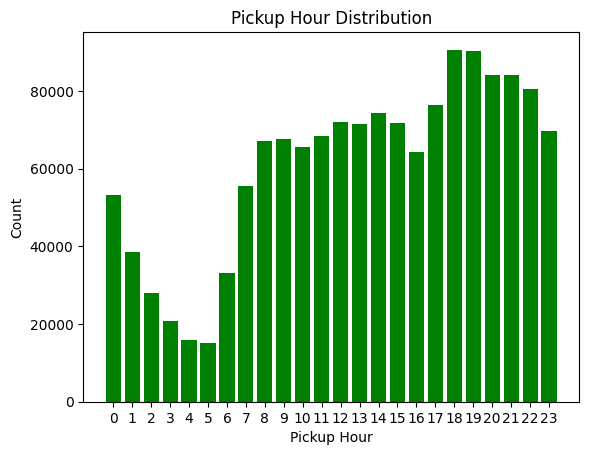

In [17]:
pickup_hour_counts = df.groupby('pickup_hour').size().reset_index(name='count')
plt.bar(pickup_hour_counts['pickup_hour'], pickup_hour_counts['count'],color = 'green')
plt.xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.xlabel('Pickup Hour')
plt.ylabel('Count')
plt.title('Pickup Hour Distribution')
plt.show()

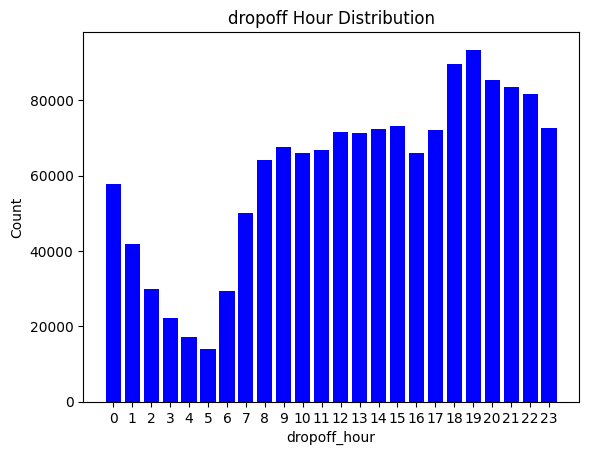

In [18]:
pickup_hour_counts = df.groupby('dropoff_hour').size().reset_index(name='count')
plt.bar(pickup_hour_counts['dropoff_hour'], pickup_hour_counts['count'],color = 'blue')
plt.xlabel('dropoff_hour')
plt.xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel('Count')
plt.title('dropoff Hour Distribution')
plt.show()

# these are the busiest hours as we can see from morning 9 am to 4 pm and 6 pm to 11 pm is the busiest hours in the day,perticullarly 7 to 8 pm are the most busiest hours of the day

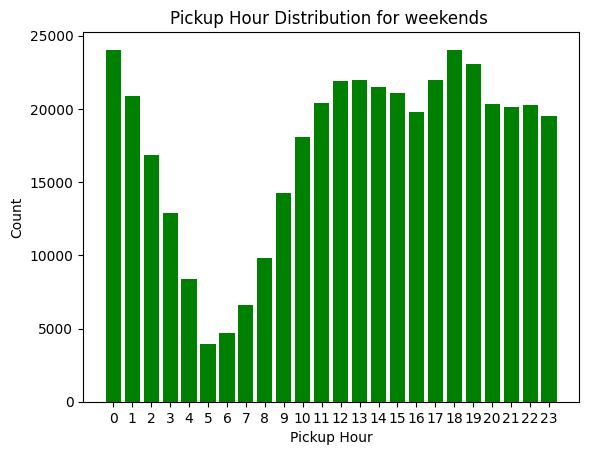

In [19]:
# busiest hours for weekends
weekend_df = df[df['weekend']==True]
PHC_weekend_df = weekend_df.groupby('pickup_hour').size().reset_index(name='count')
plt.bar(PHC_weekend_df['pickup_hour'], PHC_weekend_df['count'],color = 'green')
plt.xlabel('Pickup Hour')
plt.xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel('Count')
plt.title('Pickup Hour Distribution for weekends ')
plt.show()

# these are the busiest hours as we can see from morning 1am to 3 and from 11am to 12 pm  is the busiest hours in the weekends,perticullarly 11am to 1pm are the most busiest hours of the day

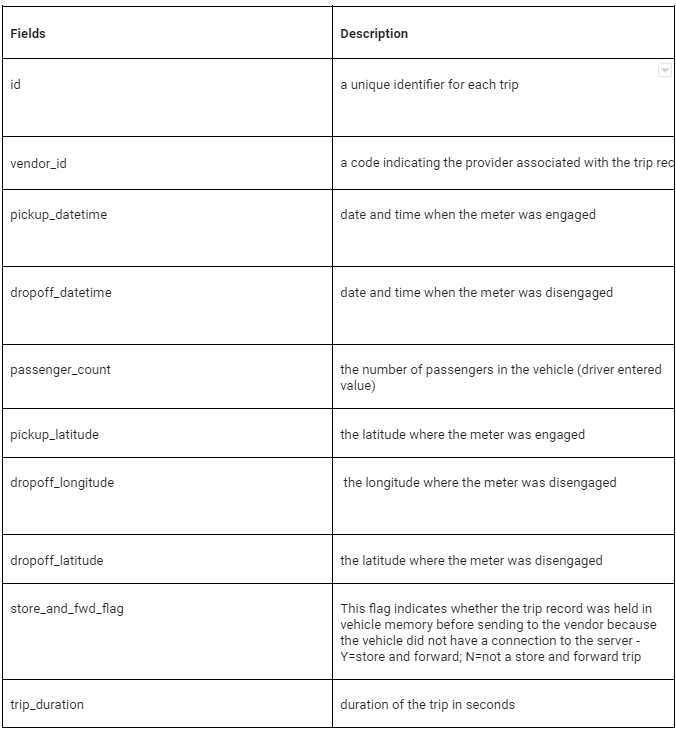

In [20]:
Image('https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Regression_NYC_Taxi_Trip_Time_Prediction_91a23744ad.png')

#** 3.DO booking happens more on weekdays or weekends**

In [21]:
nd = df.groupby('weekend')['trip_duration'].sum().reset_index()
print(nd)

   weekend  trip_duration
0    False     1014013798
1     True      385543849


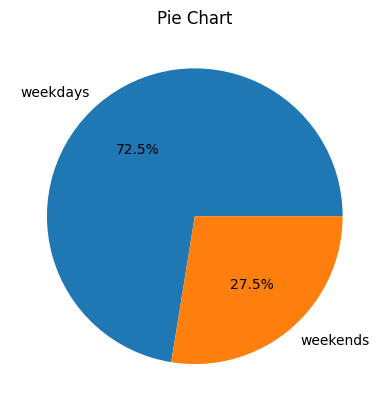

In [22]:
 #dristribution weekdays and weekends by trip_duration
import matplotlib.pyplot as plt
labels = ['weekdays','weekends']
plt.pie(nd['trip_duration'], labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.show()

# booking happens more in weekdays combine than weekends combine

# distribution of taxi trip time duration by weekdays and weekends  ,weekdays is 72.5% and weekends is 27.5%

# 4.does passenger count affect  trip duration

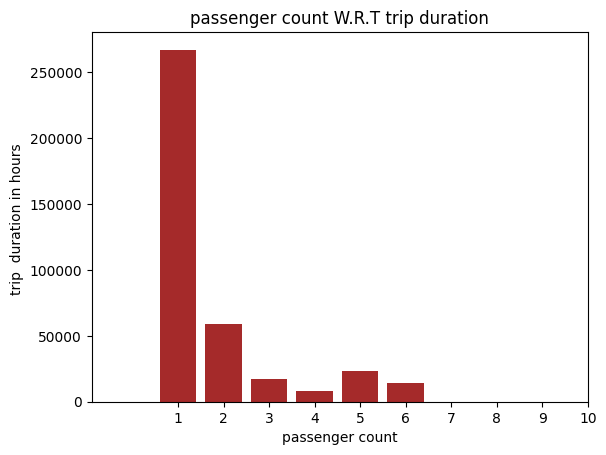

In [23]:
pd =df.groupby('passenger_count')['trip_duration'].sum().reset_index()
plt.bar(pd['passenger_count'].unique(),pd['trip_duration']/ 3600,color ='brown')
plt.xlabel('passenger count')
plt.ylabel('trip  duration in hours ')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title('passenger count W.R.T trip duration')
plt.show()

# majority of passenger count with highest trip duration is 1  then 2  and 5

# **5. trip duration W.R.T vendor id **

In [24]:
vid_df = df.groupby('vendor_id')['trip_duration'].sum().reset_index()
vid_df

,vendor_id,trip_duration
0,1,573496269
1,2,826061378


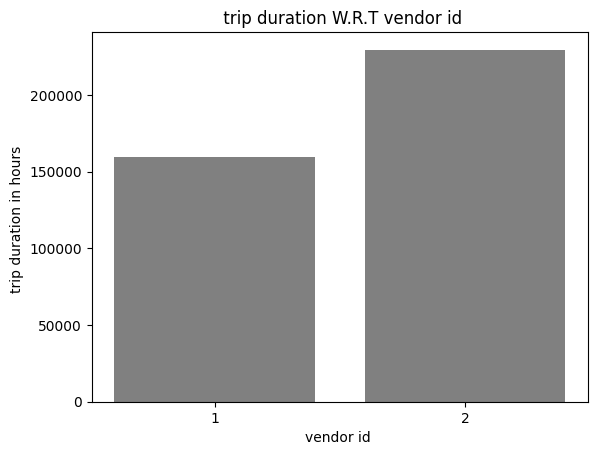

In [25]:
plt.bar(vid_df['vendor_id'], vid_df['trip_duration']/3600,color ='grey')
plt.xlabel('vendor id ')
plt.xticks([1,2])
plt.ylabel('trip duration in hours ')
plt.title(' trip duration W.R.T vendor id')
plt.show()
plt.show()


# vender id 2 has trip duration of 1.7 lakh in  hours and vendor id 1 has trip duration 2.2 lakh in hours  the majority trip duration s are from vender 2




In [26]:
sff_df = df.groupby('store_and_fwd_flag')['trip_duration'].sum().reset_index()
sff_df

,store_and_fwd_flag,trip_duration
0,N,1390862906
1,Y,8694741


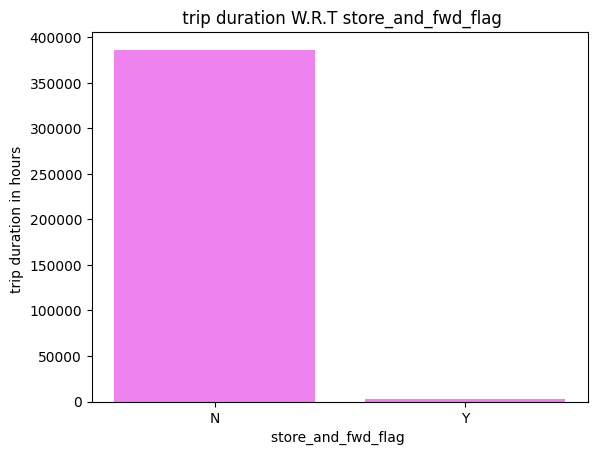

In [27]:
plt.bar(sff_df['store_and_fwd_flag'], sff_df['trip_duration']/3600,color ='violet')
plt.xlabel('store_and_fwd_flag ')
plt.xticks(['N','Y'])
plt.ylabel('trip duration in hours ')
plt.title(' trip duration W.R.T store_and_fwd_flag')
plt.show()

In [28]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,p_loc,d_loc,week_day,weekend,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,Monday,False,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Brooklyn,Brooklyn,Sunday,True,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Manhattan,Brooklyn,Tuesday,False,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Brooklyn,Brooklyn,Wednesday,False,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Manhattan,Manhattan,Saturday,True,13,13


In [29]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of the Earth in kilometers (mean value)
    R = 6371.0

    # Calculate the distance
    distance = R * c

    return distance

# Example usage
lat1, lon1 = 37.7749, -122.4194  # Latitude and longitude of location 1 (San Francisco)
lat2, lon2 = 34.0522, -118.2437  # Latitude and longitude of location 2 (Los Angeles)
# Apply the haversine function to each row of the DataFrame



df['distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


In [30]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,p_loc,d_loc,week_day,weekend,pickup_hour,dropoff_hour,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,Monday,False,17,17,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Brooklyn,Brooklyn,Sunday,True,0,0,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Manhattan,Brooklyn,Tuesday,False,11,12,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Brooklyn,Brooklyn,Wednesday,False,19,19,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Manhattan,Manhattan,Saturday,True,13,13,1.188588


In [31]:
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute
df.drop(columns=(['pickup_datetime','dropoff_datetime']),inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   passenger_count     1458644 non-null  int64  
 3   pickup_longitude    1458644 non-null  float64
 4   pickup_latitude     1458644 non-null  float64
 5   dropoff_longitude   1458644 non-null  float64
 6   dropoff_latitude    1458644 non-null  float64
 7   store_and_fwd_flag  1458644 non-null  object 
 8   trip_duration       1458644 non-null  int64  
 9   p_loc               1457848 non-null  object 
 10  d_loc               1453510 non-null  object 
 11  week_day            1458644 non-null  object 
 12  weekend             1458644 non-null  bool   
 13  pickup_hour         1458644 non-null  int64  
 14  dropoff_hour        1458644 non-null  int64  
 15  distance       

In [33]:
df['weekend'] = df['weekend'].astype(int)

In [34]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,p_loc,...,week_day,weekend,pickup_hour,dropoff_hour,distance,month,year,day,hour,minute
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,...,Monday,0,17,17,1.498521,3,2016,14,17,24
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Brooklyn,...,Sunday,1,0,0,1.805507,6,2016,12,0,43
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Manhattan,...,Tuesday,0,11,12,6.385098,1,2016,19,11,35
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Brooklyn,...,Wednesday,0,19,19,1.485498,4,2016,6,19,32
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Manhattan,...,Saturday,1,13,13,1.188588,3,2016,26,13,30


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   passenger_count     1458644 non-null  int64  
 3   pickup_longitude    1458644 non-null  float64
 4   pickup_latitude     1458644 non-null  float64
 5   dropoff_longitude   1458644 non-null  float64
 6   dropoff_latitude    1458644 non-null  float64
 7   store_and_fwd_flag  1458644 non-null  object 
 8   trip_duration       1458644 non-null  int64  
 9   p_loc               1457848 non-null  object 
 10  d_loc               1453510 non-null  object 
 11  week_day            1458644 non-null  object 
 12  weekend             1458644 non-null  int64  
 13  pickup_hour         1458644 non-null  int64  
 14  dropoff_hour        1458644 non-null  int64  
 15  distance       

In [36]:
import pandas as pd

#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
df = pd.get_dummies(df, columns=["store_and_fwd_flag", "week_day"], prefix=["store_and_fwd_flag",'week_day'])

In [37]:
df.drop(columns=['p_loc','d_loc','weekend','id'], inplace=True)


In [38]:
df['trip_duration'] = df['trip_duration']/3600

In [39]:
def remove_outliers(data):
  for colm in  ['vendor_id', 'passenger_count',  'trip_duration', 'pickup_hour', 'dropoff_hour', 'distance', 'month', 'day',
       'hour', 'minute']:
    q1= data[colm].quantile(0.25)
    q3= data[colm].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    data =  data[(data[colm] >= lower_bound) & (data[colm] <= upper_bound)]
  return data

In [40]:
df = remove_outliers(df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141745 entries, 0 to 1458643
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1141745 non-null  int64  
 1   passenger_count       1141745 non-null  int64  
 2   pickup_longitude      1141745 non-null  float64
 3   pickup_latitude       1141745 non-null  float64
 4   dropoff_longitude     1141745 non-null  float64
 5   dropoff_latitude      1141745 non-null  float64
 6   trip_duration         1141745 non-null  float64
 7   pickup_hour           1141745 non-null  int64  
 8   dropoff_hour          1141745 non-null  int64  
 9   distance              1141745 non-null  float64
 10  month                 1141745 non-null  int64  
 11  year                  1141745 non-null  int64  
 12  day                   1141745 non-null  int64  
 13  hour                  1141745 non-null  int64  
 14  minute                1141745 non-

In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame with a 'trip_duration' column
# df = ...

# Extract the 'trip_duration' column as a 1D array (reshape if needed)
trip_duration_values = df['trip_duration'].values.reshape(-1, 1)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'trip_duration' values using Min-Max scaling
trip_duration_scaled = scaler.fit_transform(trip_duration_values)

# Convert the scaled values back to a DataFrame column
df['trip_duration_scaled'] = trip_duration_scaled
df.drop(columns = (['trip_duration']),inplace = True)

df.shape


(1141745, 24)

In [43]:
x = df.drop(columns = (['trip_duration_scaled']))
y= df['trip_duration_scaled']

In [44]:
from sklearn.model_selection  import train_test_split
X_train, X_test , y_train , y_test  = train_test_split(x,y,test_size = 0.2,random_state = 42 )


In [45]:
X_train.nunique()

vendor_id                    2
passenger_count              4
pickup_longitude         18365
pickup_latitude          39785
dropoff_longitude        21466
dropoff_latitude         44501
pickup_hour                 24
dropoff_hour                24
distance                908956
month                        6
year                         1
day                         31
hour                        24
minute                      60
store_and_fwd_flag_N         2
store_and_fwd_flag_Y         2
week_day_Friday              2
week_day_Monday              2
week_day_Saturday            2
week_day_Sunday              2
week_day_Thursday            2
week_day_Tuesday             2
week_day_Wednesday           2
dtype: int64

In [46]:
def fit_and_evaluate(algorithm, X_train, y_train, X_test, y_test):


    # Fit the model
    model = algorithm
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate performance
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    return r2, mae

In [47]:
!pip install catboost

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor


In [49]:
# Linear Regression
r2_linear, mae_linear = fit_and_evaluate(LinearRegression(), X_train, y_train, X_test, y_test)
print("Linear Regression: R2 =", r2_linear, "MAE =", mae_linear)

Linear Regression: R2 = 0.48808714531773456 MAE = 0.10222441068940483


In [62]:
# Decision Tree Regression
r2_decision_tree, mae_decision_tree = fit_and_evaluate(DecisionTreeRegressor(max_depth =15,min_samples_split = 27,min_samples_leaf = 7), X_train, y_train, X_test, y_test)
print("Decision tree Regression: R2 =", r2_decision_tree, "MAE =", mae_decision_tree)

Decision tree Regression: R2 = 0.6434850181496266 MAE = 0.08234737664454357


In [61]:
# XGBoost Regression
r2_xgboost, mae_xgboost = fit_and_evaluate( XGBRegressor(n_estimators=200, random_state=42, max_depth=6), X_train, y_train, X_test, y_test)
print("R2 =", r2_xgboost, "MAE =", mae_xgboost)

R2 = 0.7589807924665434 MAE = 0.06719318414423009


In [60]:
# LightGBM Regression
r2_lightgbm, mae_lightgbm = fit_and_evaluate(LGBMRegressor(n_estimators=200), X_train, y_train, X_test, y_test)
print("R2 =", r2_lightgbm, "MAE =", mae_lightgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.149594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1471
[LightGBM] [Info] Number of data points in the train set: 913396, number of used features: 22
[LightGBM] [Info] Start training from score 0.320198
R2 = 0.7252052901126205 MAE = 0.07223081975629378


In [59]:
# CatBoost Regression
r2_catboost, mae_catboost = fit_and_evaluate(CatBoostRegressor(depth=6, n_estimators=200), X_train, y_train, X_test, y_test)
print("R2 =", r2_catboost, "MAE =", mae_catboost)

193:	learn: 0.0961889	total: 31.6s	remaining: 977ms
194:	learn: 0.0961611	total: 31.7s	remaining: 813ms
195:	learn: 0.0961353	total: 31.8s	remaining: 650ms
196:	learn: 0.0961125	total: 32s	remaining: 487ms
197:	learn: 0.0960814	total: 32.1s	remaining: 324ms
198:	learn: 0.0960210	total: 32.3s	remaining: 162ms
199:	learn: 0.0959860	total: 32.4s	remaining: 0us
R2 = 0.7427211902931465 MAE = 0.06976368476661042


In [64]:
from sklearn.ensemble import VotingRegressor
xgb = XGBRegressor()
lgb = LGBMRegressor()
cbr = CatBoostRegressor(depth=6, n_estimators=200)

regressors_list = [
    ('xgboost', xgb),
    ('lgbm', lgb),
    ('catboost', cbr)]

# Initialize the VotingRegressor
voting_regressor = VotingRegressor(estimators=regressors_list)

# Fit and evaluate the VotingRegressor
voting_regressor.fit(X_train, y_train)
predictions = voting_regressor.predict(X_test)

# Evaluate performance
r2_voting = r2_score(y_test, predictions)
mae_voting = mean_absolute_error(y_test, predictions)

# Print or use the results as needed
print("Voting Regressor: R2 =", r2_voting, "MAE =", mae_voting)


66:	learn: 0.1031908	total: 10.9s	remaining: 21.6s
67:	learn: 0.1031130	total: 11s	remaining: 21.4s
68:	learn: 0.1029913	total: 11.2s	remaining: 21.2s
69:	learn: 0.1029037	total: 11.3s	remaining: 21s
70:	learn: 0.1027666	total: 11.4s	remaining: 20.8s
71:	learn: 0.1026962	total: 11.5s	remaining: 20.5s
72:	learn: 0.1026383	total: 11.7s	remaining: 20.4s
73:	learn: 0.1024848	total: 11.8s	remaining: 20.1s
74:	learn: 0.1024268	total: 12s	remaining: 20s
75:	learn: 0.1022671	total: 12.1s	remaining: 19.8s
76:	learn: 0.1022098	total: 12.3s	remaining: 19.6s
77:	learn: 0.1021098	total: 12.4s	remaining: 19.4s
78:	learn: 0.1020008	total: 12.5s	remaining: 19.2s
79:	learn: 0.1019229	total: 12.7s	remaining: 19s
80:	learn: 0.1018336	total: 12.8s	remaining: 18.8s
81:	learn: 0.1017351	total: 12.9s	remaining: 18.6s
82:	learn: 0.1016793	total: 13.1s	remaining: 18.4s
83:	learn: 0.1015988	total: 13.2s	remaining: 18.2s
84:	learn: 0.1014978	total: 13.4s	remaining: 18.1s
85:	learn: 0.1012887	total: 13.5s	remaini

In [ ]:
Image('https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/nyc_taxi_trip_time_f41f6cab2b.png')